In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
list_ds = tf.data.Dataset.list_files('/home/vimal/Documents/wages_report/*.jpeg')


In [3]:
list_ds

<ShuffleDataset shapes: (), types: tf.string>

In [5]:
img_height, img_width = 256, 256

def normalize(input_image):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    return input_image


In [6]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img,channels=3)
  # resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

def decode_mask_img(img):
  # convert the compressed string to a 2D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [7]:
def process_path(file_path):
    
    table_mask_file_path = tf.strings.regex_replace(file_path, 'wages_report', 'table_mask')
    column_mask_file_path = tf.strings.regex_replace(file_path, 'wages_report', 'column_mask')

    img = normalize(decode_img(tf.io.read_file(file_path)))
    table_mask = normalize(decode_mask_img(tf.io.read_file(table_mask_file_path)))
    column_mask = normalize(decode_mask_img(tf.io.read_file(column_mask_file_path)))

    return img, {"table_output" : table_mask, "column_output" : column_mask }

In [8]:

DATASET_SIZE = len(list(list_ds))
train_size = int(0.9 * DATASET_SIZE)
test_size = int(0.1 * DATASET_SIZE)

train = list_ds.take(train_size)
test = list_ds.skip(train_size)

TRAIN_LENGTH = len(list(train))
BATCH_SIZE = 2
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

train = train.shuffle(BUFFER_SIZE)

train = train.map(process_path,
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)

test = test.map(process_path)

train_dataset = train.batch(BATCH_SIZE).repeat().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

In [9]:
def display(display_list):
    plt.figure(figsize=(20, 20))

    title = ['Input Image', 'Table Mask', 'Column Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

(256, 256, 3)


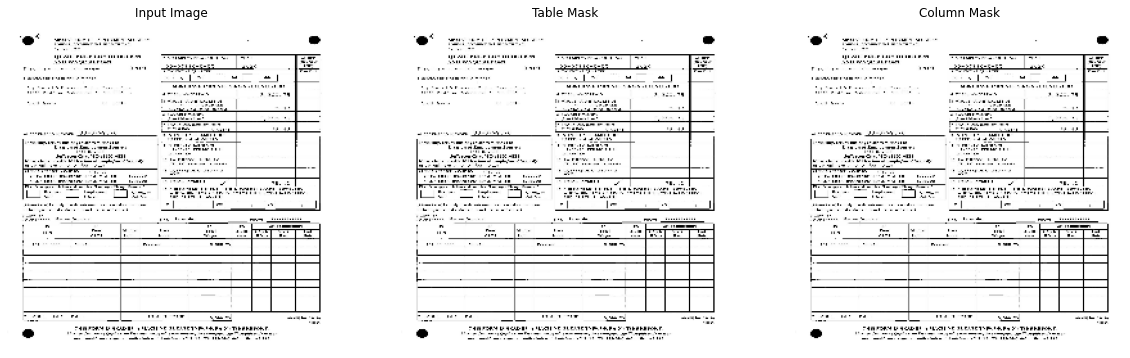

(256, 256, 3)


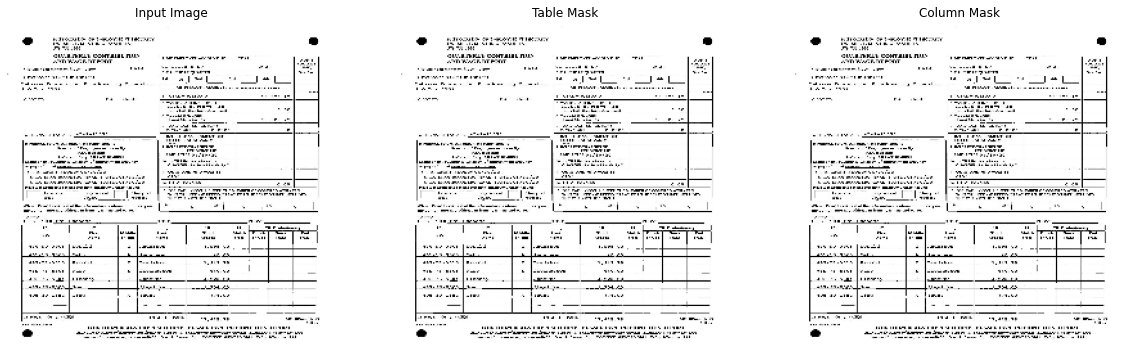

In [10]:
for image, mask  in train.take(2):
    print(image.shape)
    #print(mask.shape)
    display([image, mask['table_output'], mask['column_output']])


In [7]:
input = '/home/vimal/Downloads/Marmot/marmot/10.1.1.1.2006_3.bmp'
table_mask = '/home/vimal/Downloads/Marmot/table_mask/10.1.1.1.2006_3.jpeg'
column_mask = '/home/vimal/Downloads/Marmot/column_mask/10.1.1.1.2006_3.jpeg'

In [20]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image 


Text(0.5, 1.0, 'column_mask')

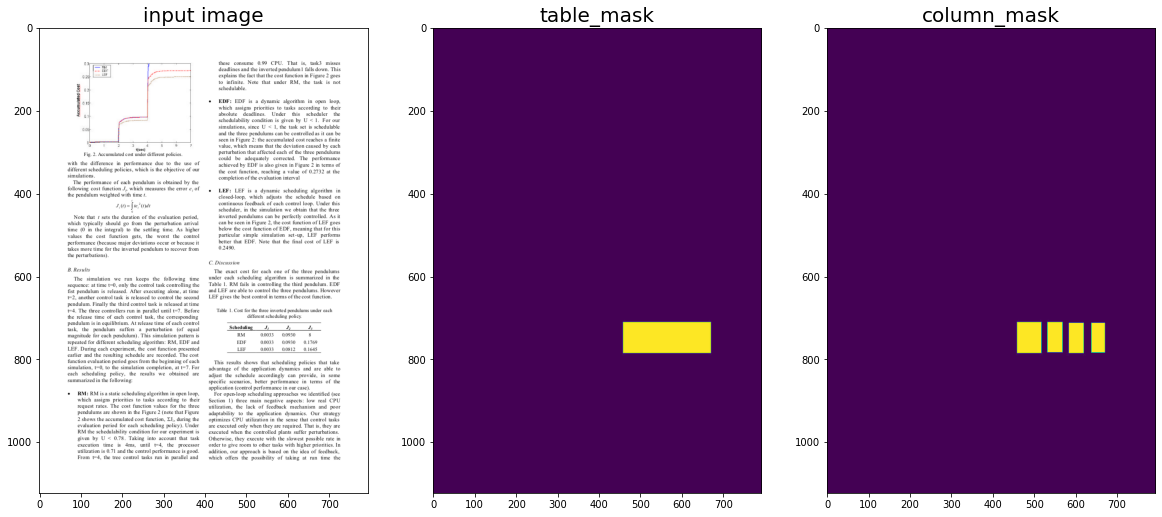

In [38]:
im = Image.open(input) 
im1 = Image.open(table_mask) 
im2 = Image.open(column_mask) 

#plt.imshow(im2)

fig = plt.figure(figsize=(20,20))
plt.tight_layout()
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.imshow(im)
axes1.set_title('input image',fontsize = 20)
axes2.imshow(im1)
axes2.set_title('table_mask',fontsize = 20)
axes3.imshow(im2)
axes3.set_title('column_mask',fontsize = 20)
